# model tests

In [11]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sympy
from transformers import T5Tokenizer, FlaxT5ForConditionalGeneration
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [12]:
# You can load and test pretrained models from here
model_name = "google/t5-v1_1-small" 
tokenizer = T5Tokenizer.from_pretrained(model_name, legacy=False)
model = FlaxT5ForConditionalGeneration.from_pretrained(model_name)

In [13]:
# Get current working directory
print(os.getcwd())

/home/rc/version-tab/notebooks


In [18]:
def load_pairs(file_path):
    with open(file_path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]
    return [(lines[i], lines[i+1]) for i in range(0, len(lines), 2)]

# Verify file paths
interpolate_files = glob.glob("/home/rc/varsion-tab/math/interpolate/*.txt")
extrapolate_files = glob.glob("/home/rc/version-tab/math/extrapolate/*.txt")

interpolate_pairs = []
for file in interpolate_files:
    interpolate_pairs.extend(load_pairs(file))

extrapolate_pairs = []
for file in extrapolate_files:
    extrapolate_pairs.extend(load_pairs(file))

In [19]:
test_questions = [q for q, a in extrapolate_pairs][:20]
test_answers = [a for q, a in extrapolate_pairs][:20]

predictions = []

for question in tqdm(test_questions, desc="Evaluating"):
    prompt = f"solve: {question}"
    input_ids = tokenizer(prompt, return_tensors="jax").input_ids
    output_ids = model.generate(input_ids, max_length=50).sequences
    pred = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    predictions.append(pred)

df = pd.DataFrame({
    "question": test_questions,
    "true_answer": test_answers,
    "predicted": predictions
})

Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:33<00:00,  4.69s/it]



Text Match Metrics (Exact string):
 Accuracy:  0.00
 Precision: 0.00
 Recall:    0.00
 F1 Score:  0.00

Symbolic equivalence accuracy: 0.00

Classification Report:
                                                               precision    recall  f1-score   support

                                                     ! ! ! !!       0.00      0.00      0.00       0.0
                                                   ! ! ! !! !       0.00      0.00      0.00       0.0
           ) - (- - (-)))))))))))))))))))))))))))))))))))))))       0.00      0.00      0.00       0.0
) Solve: solve: (-34048))))))))))))))))))))))))))))))))))))))       0.00      0.00      0.00       0.0
                                   ). Calculate 168*36*168* .       0.00      0.00      0.00       0.0
                              ). Calculate: Calculate () (-1)       0.00      0.00      0.00       0.0
                                        ). Solve: ((-9)/4 )).       0.00      0.00      0.00       0.0
          

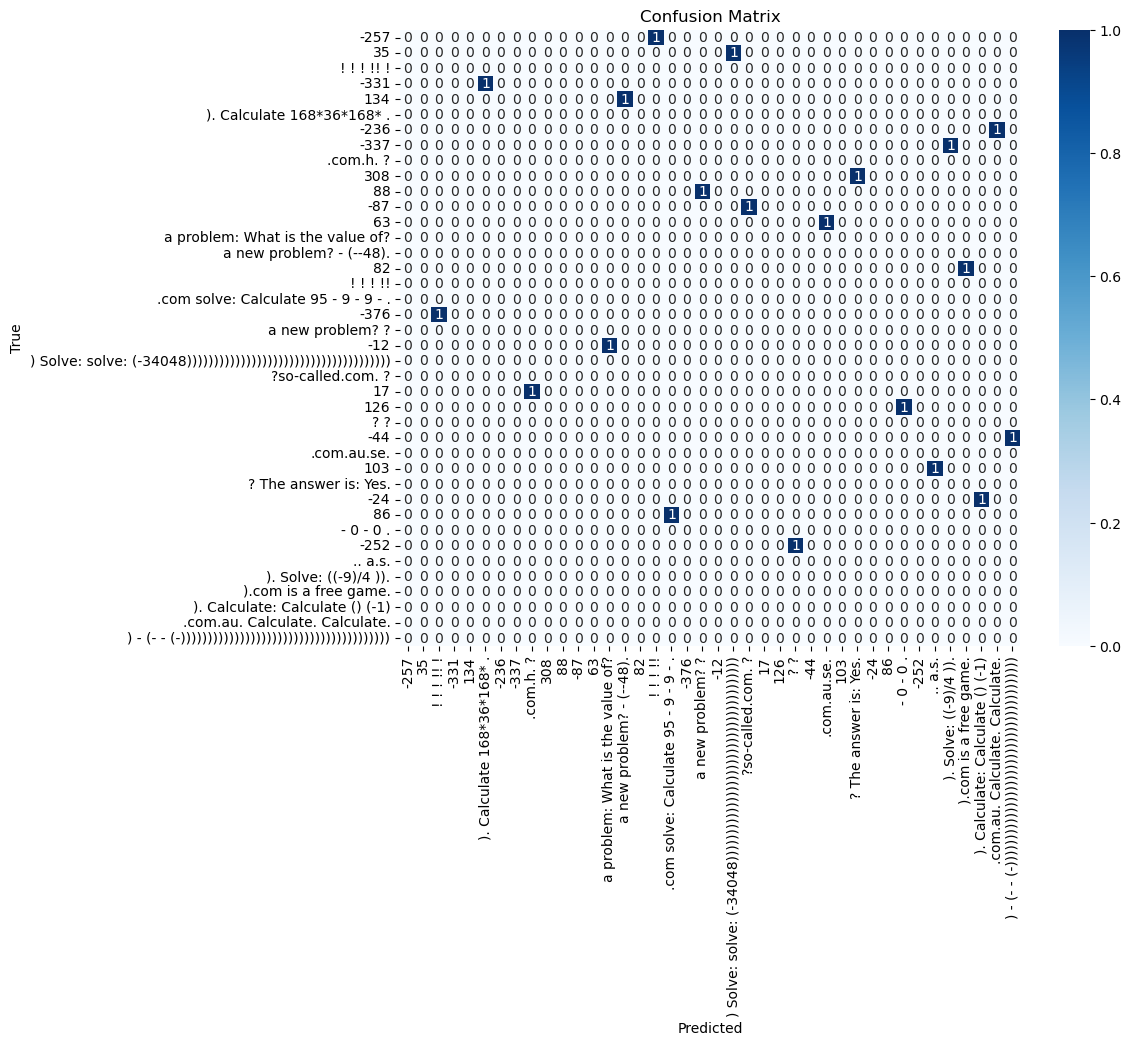

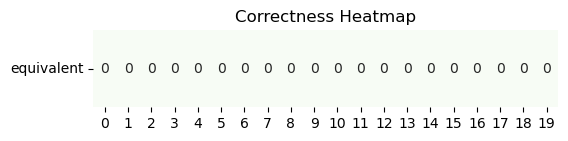

In [20]:
df["text_match"] = df["true_answer"] == df["predicted"]

accuracy_text = accuracy_score(df["true_answer"], df["predicted"])
f1_text = f1_score(df["true_answer"], df["predicted"], average="macro", zero_division=0)
precision_text = precision_score(df["true_answer"], df["predicted"], average="macro", zero_division=0)
recall_text = recall_score(df["true_answer"], df["predicted"], average="macro", zero_division=0)

print("\nText Match Metrics (Exact string):")
print(f" Accuracy:  {accuracy_text:.2f}")
print(f" Precision: {precision_text:.2f}")
print(f" Recall:    {recall_text:.2f}")
print(f" F1 Score:  {f1_text:.2f}")

def is_equivalent(a1, a2):
    try:
        e1 = sympy.simplify(sympy.sympify(a1))
        e2 = sympy.simplify(sympy.sympify(a2))
        return e1 == e2
    except:
        return False

df["equivalent"] = [is_equivalent(t, p) for t, p in zip(df["true_answer"], df["predicted"])]
accuracy = df["equivalent"].mean()
print(f"\nSymbolic equivalence accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(df["true_answer"], df["predicted"], zero_division=0))

labels = list(set(df["true_answer"]).union(set(df["predicted"])))
cm = confusion_matrix(df["true_answer"], df["predicted"], labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(6, 1))
sns.heatmap(df[["equivalent"]].T, cmap="Greens", cbar=False, annot=True)
plt.title("Correctness Heatmap")
plt.yticks(rotation=0)
plt.show()

In [32]:
print("Train question count:", len(train_questions))
print("First 3 questions:", train_questions[:3])

Train question count: 0
First 3 questions: []


In [34]:
import glob

interpolate_files = glob.glob("/home/rc/version-tab/math/interpolate/*.txt")
print("Interpolate files found:", interpolate_files)

Interpolate files found: ['/home/rc/version-tab/math/interpolate/numbers__place_value_composed.txt', '/home/rc/version-tab/math/interpolate/arithmetic__simplify_surd.txt', '/home/rc/version-tab/math/interpolate/arithmetic__mul_div_multiple.txt', '/home/rc/version-tab/math/interpolate/calculus__differentiate_composed.txt', '/home/rc/version-tab/math/interpolate/probability__swr_p_level_set.txt', '/home/rc/version-tab/math/interpolate/numbers__lcm.txt', '/home/rc/version-tab/math/interpolate/arithmetic__add_or_sub.txt', '/home/rc/version-tab/math/interpolate/numbers__gcd_composed.txt', '/home/rc/version-tab/math/interpolate/calculus__differentiate.txt', '/home/rc/version-tab/math/interpolate/numbers__is_prime_composed.txt', '/home/rc/version-tab/math/interpolate/numbers__round_number.txt', '/home/rc/version-tab/math/interpolate/polynomials__add.txt', '/home/rc/version-tab/math/interpolate/arithmetic__add_sub_multiple.txt', '/home/rc/version-tab/math/interpolate/algebra__polynomial_roots_

In [36]:
if interpolate_files:
    with open(interpolate_files[0], "r") as f:
        lines = f.readlines()
    print("First 10 lines of first file:")
    print(lines[:10])
else:
    print("No interpolate files found! Check your path.")

First 10 lines of first file:
['Let i(y) = -6*y**3 - 10*y**2 - 12*y + 26. Let f(o) = -5*o**3 - 11*o**2 - 11*o + 27. Let p(u) = -5*f(u) + 4*i(u). What is the tens digit of p(-13)?\n', '1\n', 'Suppose j = 4*j - 3*t - 28239, 4*t = -5*j + 47083. What is the thousands digit of j?\n', '9\n', 'Let y(v) = 6*v**2 - 11*v - 13. Let w be y(-7). Suppose -2*r + 180 = -w. What is the hundreds digit of r?\n', '2\n', 'Let f(n) = -1 + 1 + n - 1. Let a be f(5). Suppose -u + 7*x - a*x = -43, -5*x = u - 11. What is the tens digit of u?\n', '3\n', 'Let d(w) = -w**2 - 21*w - 12. Suppose 3*z - 163 = -z - 3*x, 3*x - 77 = -2*z. Suppose 17 = -5*s - z. What is the tens digit of d(s)?\n', '9\n']


In [37]:
with open(interpolate_files[0], "r") as f:
    lines = [line.strip() for line in f if line.strip()]

print("Total non-empty lines:", len(lines))

# Build pairs from lines
cleaned_pairs = [(lines[i], lines[i+1]) for i in range(0, len(lines)-1, 2)]

# Separate questions and answers
train_questions = [q for q, a in cleaned_pairs]
train_answers = [a for q, a in cleaned_pairs]

print("Questions count:", len(train_questions))
print("First question:", train_questions[0])
print("First answer:", train_answers[0])

Total non-empty lines: 20000
Questions count: 10000
First question: Let i(y) = -6*y**3 - 10*y**2 - 12*y + 26. Let f(o) = -5*o**3 - 11*o**2 - 11*o + 27. Let p(u) = -5*f(u) + 4*i(u). What is the tens digit of p(-13)?
First answer: 1


In [42]:
print("interpolate_pairs count:", len(interpolate_pairs))
print("First few pairs:", interpolate_pairs[:2])

interpolate_pairs count: 0
First few pairs: []


In [41]:
# Try smaller size data
small_questions = [q.strip() for q in train_questions[:100] if q.strip()]
small_answers = [a.strip() for a in train_answers[:100] if a.strip()]

print("Questions count:", len(small_questions))
print("Answers count:", len(small_answers))
assert len(small_questions) == len(small_answers), "Questions and answers count mismatch!"
assert len(small_questions) > 0, "Questions list is empty!"

Questions count: 0
Answers count: 0


AssertionError: Questions list is empty!

In [ ]:
# End of model tests